In [1]:
import numpy as np
import mpiutil
import pickle, os
from linear_solver import cg, pytorch_lin_solver
from scipy.linalg import solve

from pygdsm import GlobalSkyModel
from full_Gibbs_sampler import full_Gibbs_sampler_multi_TODS

from TOD_simulator import TOD_sim
import time 
import logging

# Configure logging to print to the console
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Optionally, configure logging to write to a file
# logging.basicConfig(filename='/Users/zzhang/Workspace/flicker/logfile.log', level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

start_time = time.time()
# Antenna position: Latitude: -30.7130° S; Longitude: 21.4430° E.

# Save the "local_TOD" objects
savepath = "/Users/zzhang/Dataspace/flicker/"
# savepath = "/Users/user/TOD_simulations/"
TOD_savename = "TOD_sim_{}.pkl".format(mpiutil.rank)
# combind the savepath and savename
TOD_savepath = os.path.join(savepath, TOD_savename)

# If TOD_savepath exists, directly read it
if os.path.exists(TOD_savepath):
    with open(TOD_savepath, 'rb') as f:
        local_TOD = pickle.load(f)

2025-03-29 12:09:43,944 - INFO - 0.0 180.0 -180.0 180.0
2025-03-29 12:09:43,945 - INFO - The interval between parallels is 30 deg -0.00'.
2025-03-29 12:09:43,945 - INFO - The interval between meridians is 30 deg -0.00'.


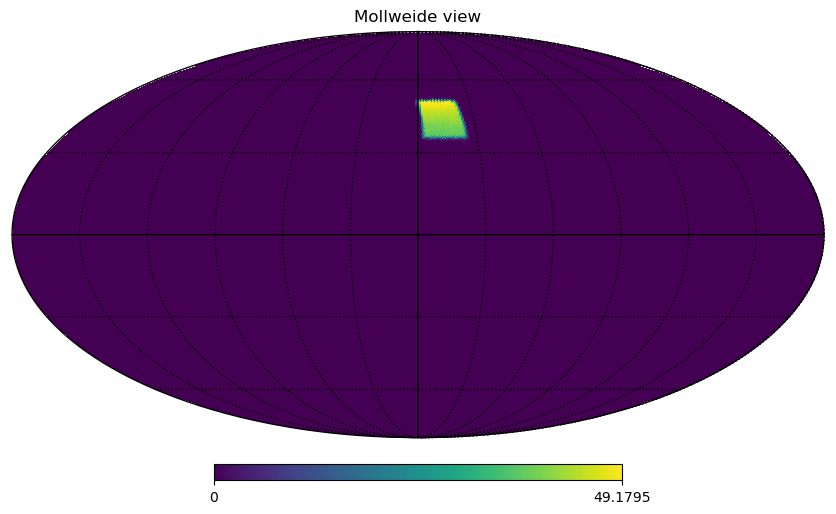

In [6]:
import healpy as hp

hp.mollview(local_TOD.full_sum_map)
hp.graticule()

In [3]:
np.sum(local_TOD.full_bool_map)

np.int64(377)

In [4]:
local_TOD.local_TOD_list[0].shape

(2640,)

In [5]:
# show all keys
local_TOD.__dict__.keys()

dict_keys(['ant_lat', 'ant_lon', 'ant_hei', 'T_ndiode', 'location', 'local_gain_params_list', 'local_rec_params_list', 'local_noise_params_list', 'n_elevation', 'local_t_list', 'n_chunks', 'nside', 'local_Tsky_proj_list', 'pixel_indices', 'full_bool_map', 'full_sum_map', 'Tsky', 'local_TOD_list', 'local_rec_proj_list', 'local_gain_proj_list', 'local_TOD_ndiode_list'])

In [8]:
from pygdsm import GlobalSkyModel

gsm = GlobalSkyModel()
skymap = gsm.generate(500)

skymap_64 = hp.ud_grade(skymap, nside_out=64)
hp.get_nside(skymap_64)

64